In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['axes.titlesize'] = 16
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

# Problem 1: Clustering

## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage. 

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis). 

#### 1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct. 

In [3]:
df = pd.read_csv(r'C:\Users\User\Downloads\bank_marketing_part1_Data.csv')

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [8]:
df.shape

(210, 7)

In [9]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [12]:
np.arange(0,6)

array([0, 1, 2, 3, 4, 5])

In [13]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [83]:
df.columns[0]

'spending'

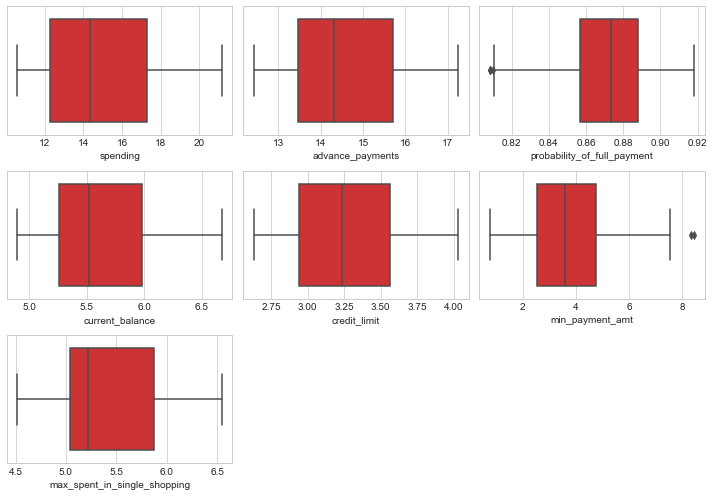

In [86]:

plt.figure(figsize=(10,7))
plt.subplot(3,3,1)
sns.boxplot(data = df,x = df.columns[0])
plt.subplot(3,3,2)
sns.boxplot(data = df,x = df.columns[1])
plt.subplot(3,3,3)
sns.boxplot(data = df,x = df.columns[2])
plt.subplot(3,3,4)
sns.boxplot(data = df,x = df.columns[3])
plt.subplot(3,3,5)
sns.boxplot(data = df,x = df.columns[4])
plt.subplot(3,3,6)
sns.boxplot(data = df,x = df.columns[5])
plt.subplot(3,3,7)
sns.boxplot(data = df,x = df.columns[6])
plt.tight_layout()

In [15]:
#It is evident that there are oultiers in only two columns (probability_of_full_payment & min_payment_amt)

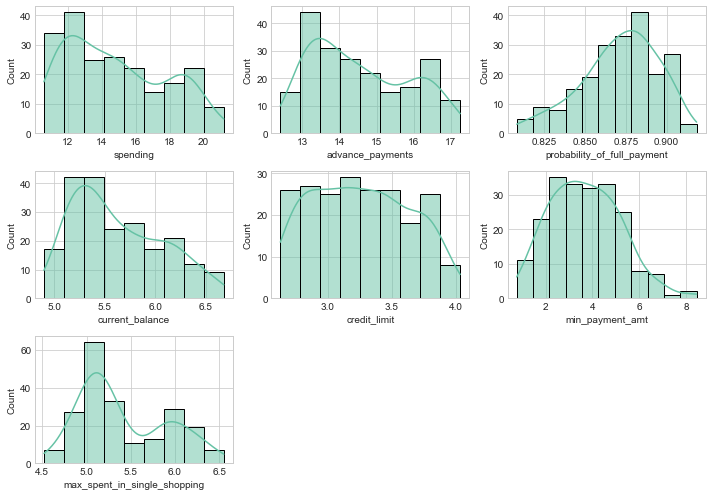

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(3,3,1)
sns.histplot(data = df,x = df.columns[0],kde=True)
plt.subplot(3,3,2)
sns.histplot(data = df,x = df.columns[1],kde=True)
plt.subplot(3,3,3)
sns.histplot(data = df,x = df.columns[2],kde=True)
plt.subplot(3,3,4)
sns.histplot(data = df,x = df.columns[3],kde=True)
plt.subplot(3,3,5)
sns.histplot(data = df,x = df.columns[4],kde=True)
plt.subplot(3,3,6)
sns.histplot(data = df,x = df.columns[5],kde=True)
plt.subplot(3,3,7)
sns.histplot(data = df,x = df.columns[6],kde=True)
plt.tight_layout()

In [17]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ') 
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df[column], kde=False, color='g');
    plt.title('Distribution plot of '+ column)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.title('Box plot of '+ column)
    plt.show()

In [18]:
df_num = df.select_dtypes(include = ['float64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

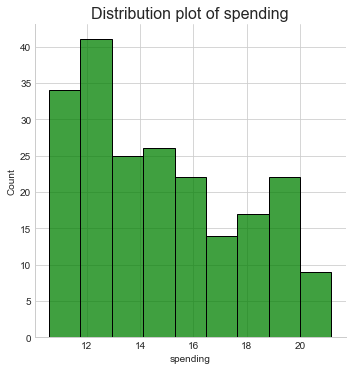

BoxPlot of spending
----------------------------------------------------------------------------


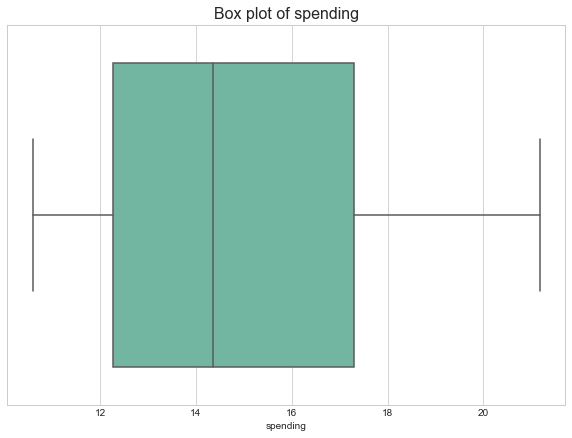

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

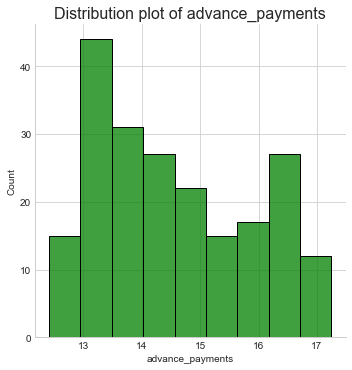

BoxPlot of advance_payments
----------------------------------------------------------------------------


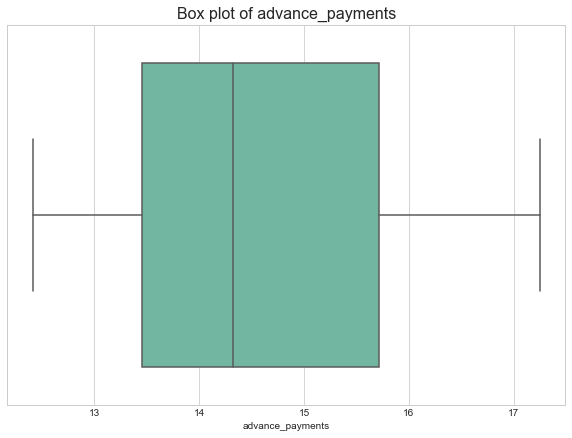

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

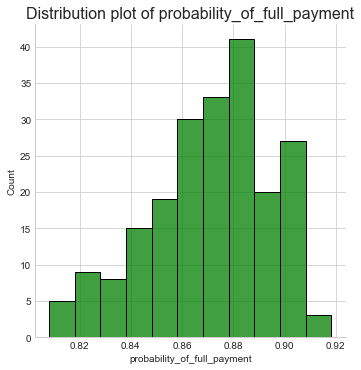

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


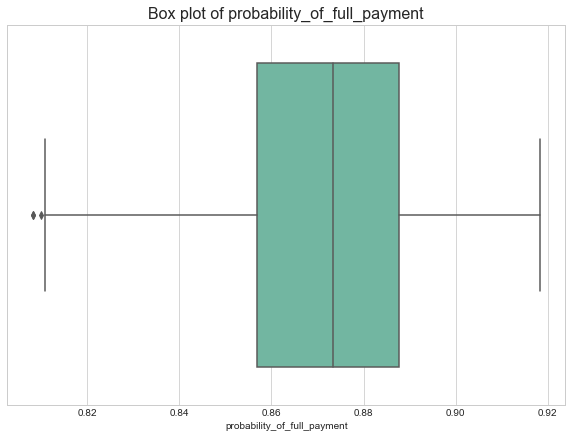

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

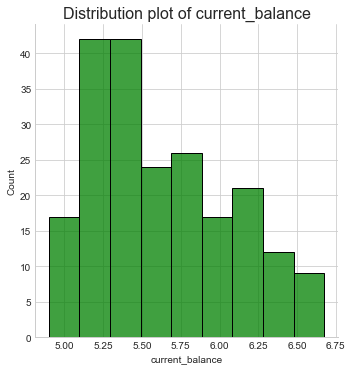

BoxPlot of current_balance
----------------------------------------------------------------------------


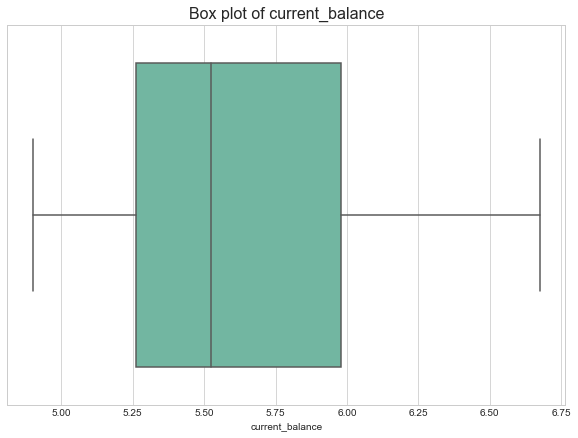

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

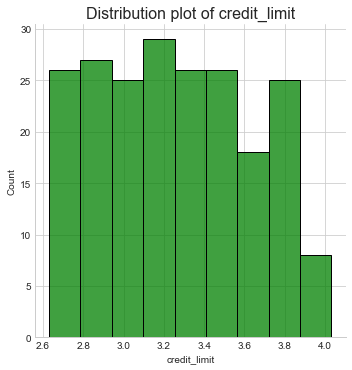

BoxPlot of credit_limit
----------------------------------------------------------------------------


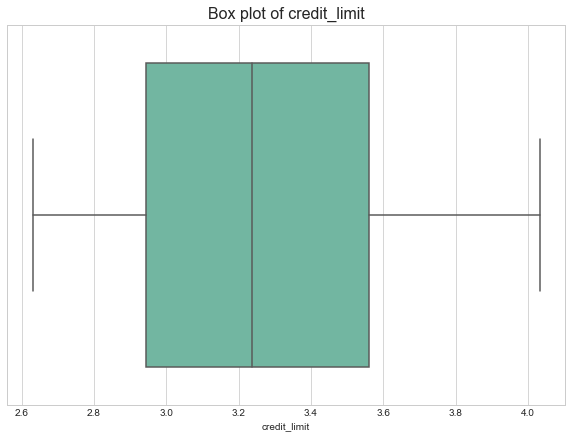

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

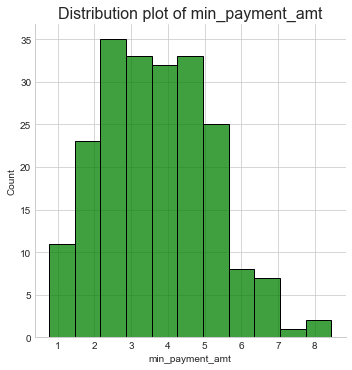

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


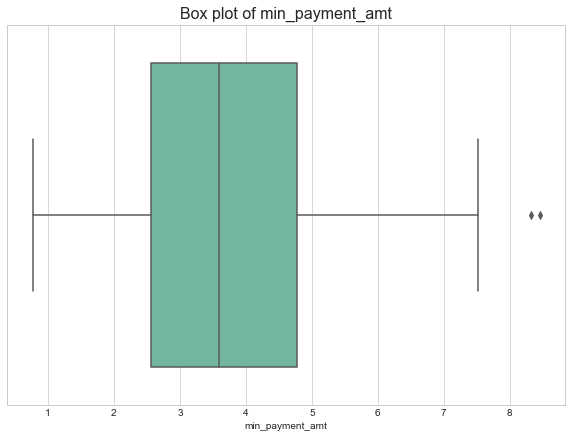

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

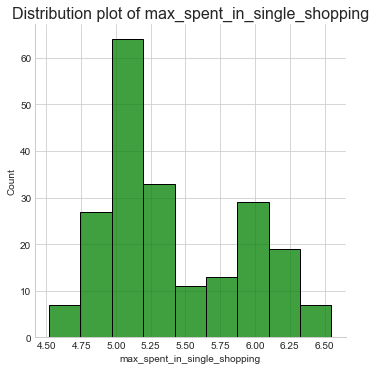

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


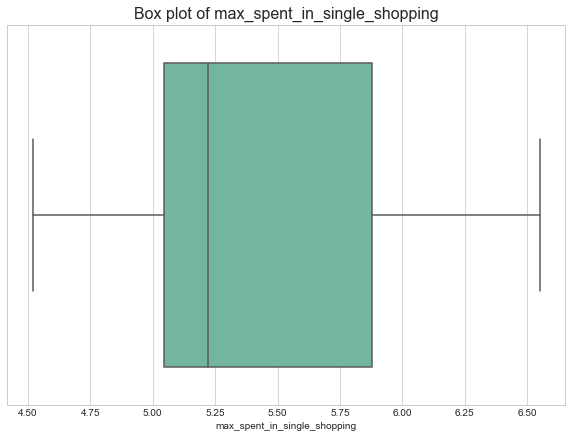

In [19]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x)

In [20]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


In [21]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [22]:
#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
#If the skewness is less than -1 or greater than 1, the data are highly skewed


In [23]:
for i in df.columns[0:9]:
    print(i)

spending
advance_payments
probability_of_full_payment
current_balance
credit_limit
min_payment_amt
max_spent_in_single_shopping


In [24]:
def Five_number_Sumamry(column):    
    print('Five number summary of -',column)
    five_num = [df[column].quantile(0), 
            df[column].quantile(0.25), 
            df[column].quantile(0.50), 
            df[column].quantile(0.75), 
            df[column].quantile(1)]
    print ('Minimum:',five_num[0],'\n25%:',five_num[1],'\n50% or Median:',five_num[2],'\n75%:',five_num[3],'\nMaximum:',five_num[4])
    print('IQR:',stats.iqr(df[column])) 
    print("----------------------------------------------------------------------------")

In [25]:
for x in lstnumericcolumns:
    Five_number_Sumamry(x)

Five number summary of - spending
Minimum: 10.59 
25%: 12.27 
50% or Median: 14.355 
75%: 17.305 
Maximum: 21.18
IQR: 5.035
----------------------------------------------------------------------------
Five number summary of - advance_payments
Minimum: 12.41 
25%: 13.45 
50% or Median: 14.32 
75%: 15.715 
Maximum: 17.25
IQR: 2.2650000000000006
----------------------------------------------------------------------------
Five number summary of - probability_of_full_payment
Minimum: 0.8081 
25%: 0.8569 
50% or Median: 0.8734500000000001 
75%: 0.887775 
Maximum: 0.9183
IQR: 0.030874999999999986
----------------------------------------------------------------------------
Five number summary of - current_balance
Minimum: 4.899 
25%: 5.26225 
50% or Median: 5.5235 
75%: 5.97975 
Maximum: 6.675
IQR: 0.7175000000000002
----------------------------------------------------------------------------
Five number summary of - credit_limit
Minimum: 2.63 
25%: 2.944 
50% or Median: 3.237 
75%: 3.56175 
M

In [26]:
for i, col in enumerate(df.columns[0:9]):
    min = df[col].quantile(0.25)-(1.5*(stats.iqr(df[col])))
    max = df[col].quantile(0.75)+(1.5*(stats.iqr(df[col])))
    print('Calcluated mininmum for',col,'is', min ,'\nCalcluated maximum for',col,'is', round(max,2))
    eq = df[df[col]<min].count()[col]/df[col].count()+df[df[col]> max].count()[col]/df[col].count()
    print('The outlier percentage in',col,'is',round((eq)*100,2),'%')
    print("----------------------------------------------------------------------------")

Calcluated mininmum for spending is 4.717499999999999 
Calcluated maximum for spending is 24.86
The outlier percentage in spending is 0.0 %
----------------------------------------------------------------------------
Calcluated mininmum for advance_payments is 10.052499999999998 
Calcluated maximum for advance_payments is 19.11
The outlier percentage in advance_payments is 0.0 %
----------------------------------------------------------------------------
Calcluated mininmum for probability_of_full_payment is 0.8105875 
Calcluated maximum for probability_of_full_payment is 0.93
The outlier percentage in probability_of_full_payment is 1.43 %
----------------------------------------------------------------------------
Calcluated mininmum for current_balance is 4.186 
Calcluated maximum for current_balance is 7.06
The outlier percentage in current_balance is 0.0 %
----------------------------------------------------------------------------
Calcluated mininmum for credit_limit is 2.017375 


In [27]:
#There are 3 outlier values in dataset for the column probability_of_full_payment
#The percentage of outlier probability is 1.42%

In [28]:
#There are 2 outlier values in dataset for the column min_payment_amt
#The percentage of outlier probability is 0.95%

In [29]:
from scipy.stats import iqr

In [30]:
np.percentile(df['spending'],.25) - (1.5*iqr(df['spending']))

3.115874999999999

In [31]:
def percent_outlier(_series):
    counter = 0
    lb = _series.quantile(0.25)-(1.5*(stats.iqr(_series)))
    ub = _series.quantile(0.75)+(1.5*(stats.iqr(_series)))
    for val in _series:
        if (val>ub) or (val<lb): 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)


In [32]:
def outlier_percentage_df(df, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(df[x]),4)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [33]:
percent_outlier(df['spending'])

0.0

In [34]:
outlier_percentage_df(df,df.columns)

,% OUTLIERS
probability_of_full_payment,1.4286
min_payment_amt,0.9524
spending,0.0000
advance_payments,0.0000
current_balance,0.0000
credit_limit,0.0000
max_spent_in_single_shopping,0.0000


<AxesSubplot:>

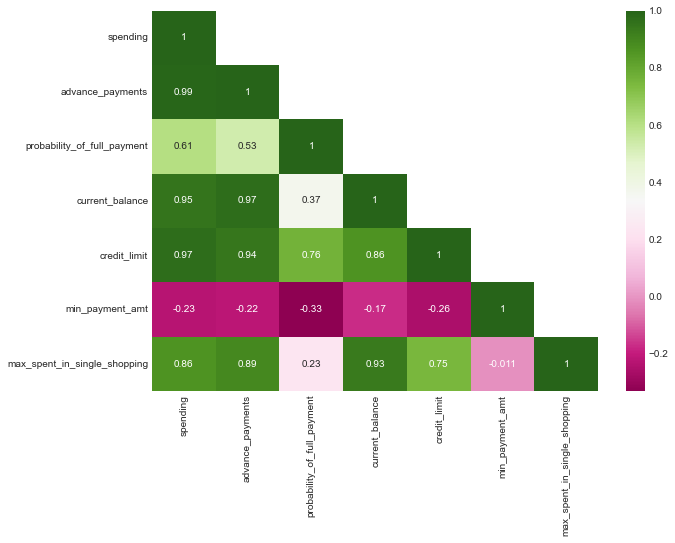

In [35]:
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),1),cmap="PiYG")

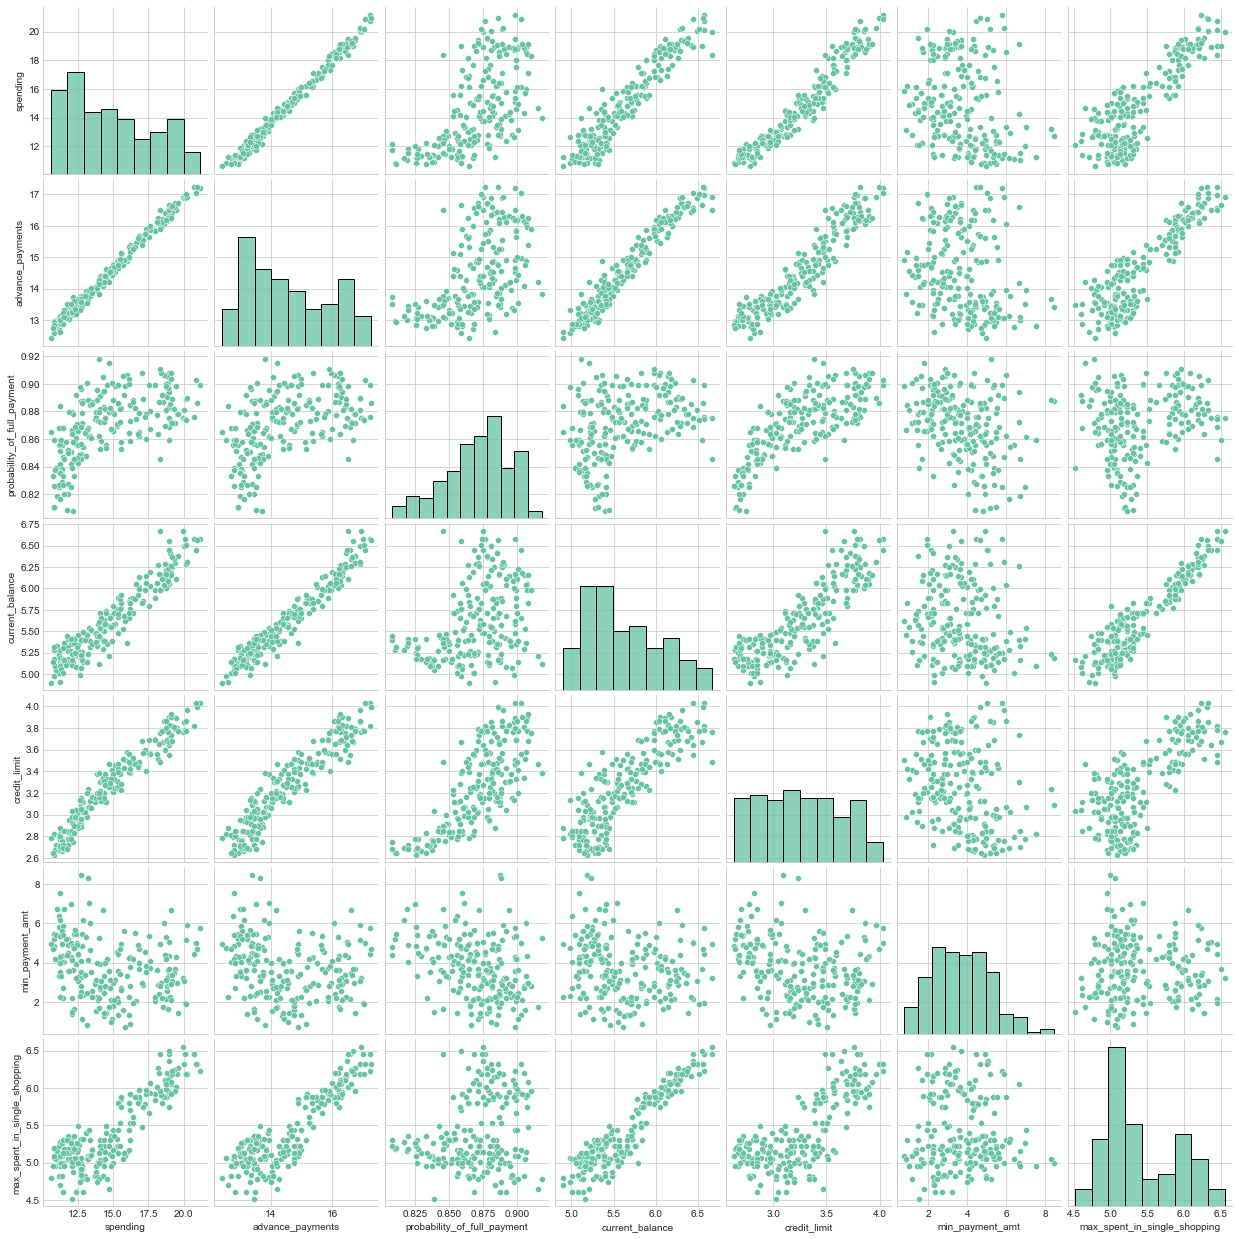

In [36]:
sns.pairplot(df)
sns.set_palette("Set1")

In [37]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


In [38]:
#It is evident that most columns are highly correlated

#### 1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works. 

In [39]:
# Yes, scaling is required in this data set as all features have different values and to ensure that none of the
#feature is identified as important only because of the values, scaling is mandatory for this data set

In [40]:
#Scaling does not treat outliers.Scaling is a concern between the columns whereas outliers  are found within the column.

In [41]:
from scipy.stats import zscore

In [42]:
df_scaled = df.apply(zscore)

In [43]:
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


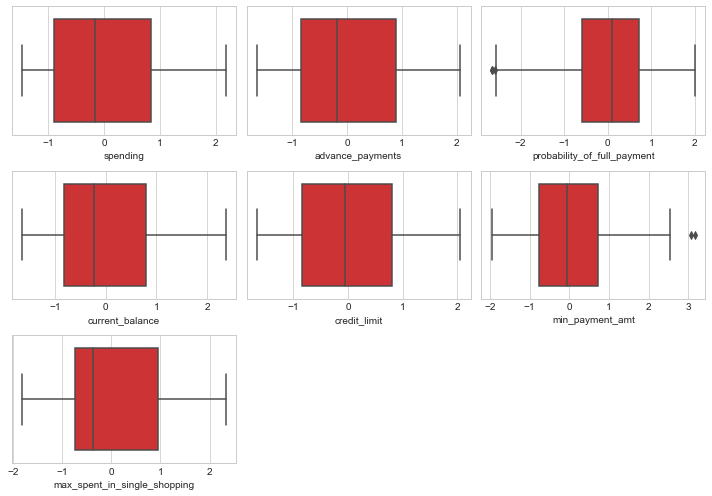

In [44]:
plt.figure(figsize=(10,7))
plt.subplot(3,3,1)
sns.boxplot(data = df_scaled,x = df_scaled.columns[0])
plt.subplot(3,3,2)
sns.boxplot(data = df_scaled,x = df_scaled.columns[1])
plt.subplot(3,3,3)
sns.boxplot(data = df_scaled,x = df_scaled.columns[2])
plt.subplot(3,3,4)
sns.boxplot(data = df_scaled,x = df_scaled.columns[3])
plt.subplot(3,3,5)
sns.boxplot(data = df_scaled,x = df_scaled.columns[4])
plt.subplot(3,3,6)
sns.boxplot(data = df_scaled,x = df_scaled.columns[5])
plt.subplot(3,3,7)
sns.boxplot(data = df_scaled,x = df_scaled.columns[6])
plt.tight_layout()

In [45]:
#It is evident that scaling has not affetcted the dataset

In [46]:
for i, col in enumerate(df.columns):
    sd = np.std(df[col])
    print('The standard deviation for',col,'item is', round(sd,2))

The standard deviation for spending item is 2.9
The standard deviation for advance_payments item is 1.3
The standard deviation for probability_of_full_payment item is 0.02
The standard deviation for current_balance item is 0.44
The standard deviation for credit_limit item is 0.38
The standard deviation for min_payment_amt item is 1.5
The standard deviation for max_spent_in_single_shopping item is 0.49


In [47]:
for i, col in enumerate(df_scaled.columns):
    sd = np.std(df_scaled[col])
    print('The standard deviation scaled data for',col,'item is', round(sd,2))

The standard deviation scaled data for spending item is 1.0
The standard deviation scaled data for advance_payments item is 1.0
The standard deviation scaled data for probability_of_full_payment item is 1.0
The standard deviation scaled data for current_balance item is 1.0
The standard deviation scaled data for credit_limit item is 1.0
The standard deviation scaled data for min_payment_amt item is 1.0
The standard deviation scaled data for max_spent_in_single_shopping item is 1.0


In [48]:
for i, col in enumerate(df.columns):
    sd = np.var(df[col])
    print('The variance of',col,'item is', round(sd,2))

The variance of spending item is 8.43
The variance of advance_payments item is 1.7
The variance of probability_of_full_payment item is 0.0
The variance of current_balance item is 0.2
The variance of credit_limit item is 0.14
The variance of min_payment_amt item is 2.25
The variance of max_spent_in_single_shopping item is 0.24


In [49]:
for i, col in enumerate(df_scaled.columns):
    sd = np.var(df_scaled[col])
    print('The variance of scaled data for',col,'item is', round(sd,2))

The variance of scaled data for spending item is 1.0
The variance of scaled data for advance_payments item is 1.0
The variance of scaled data for probability_of_full_payment item is 1.0
The variance of scaled data for current_balance item is 1.0
The variance of scaled data for credit_limit item is 1.0
The variance of scaled data for min_payment_amt item is 1.0
The variance of scaled data for max_spent_in_single_shopping item is 1.0


#### 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters. 

In [50]:
import scipy.cluster.hierarchy as shc

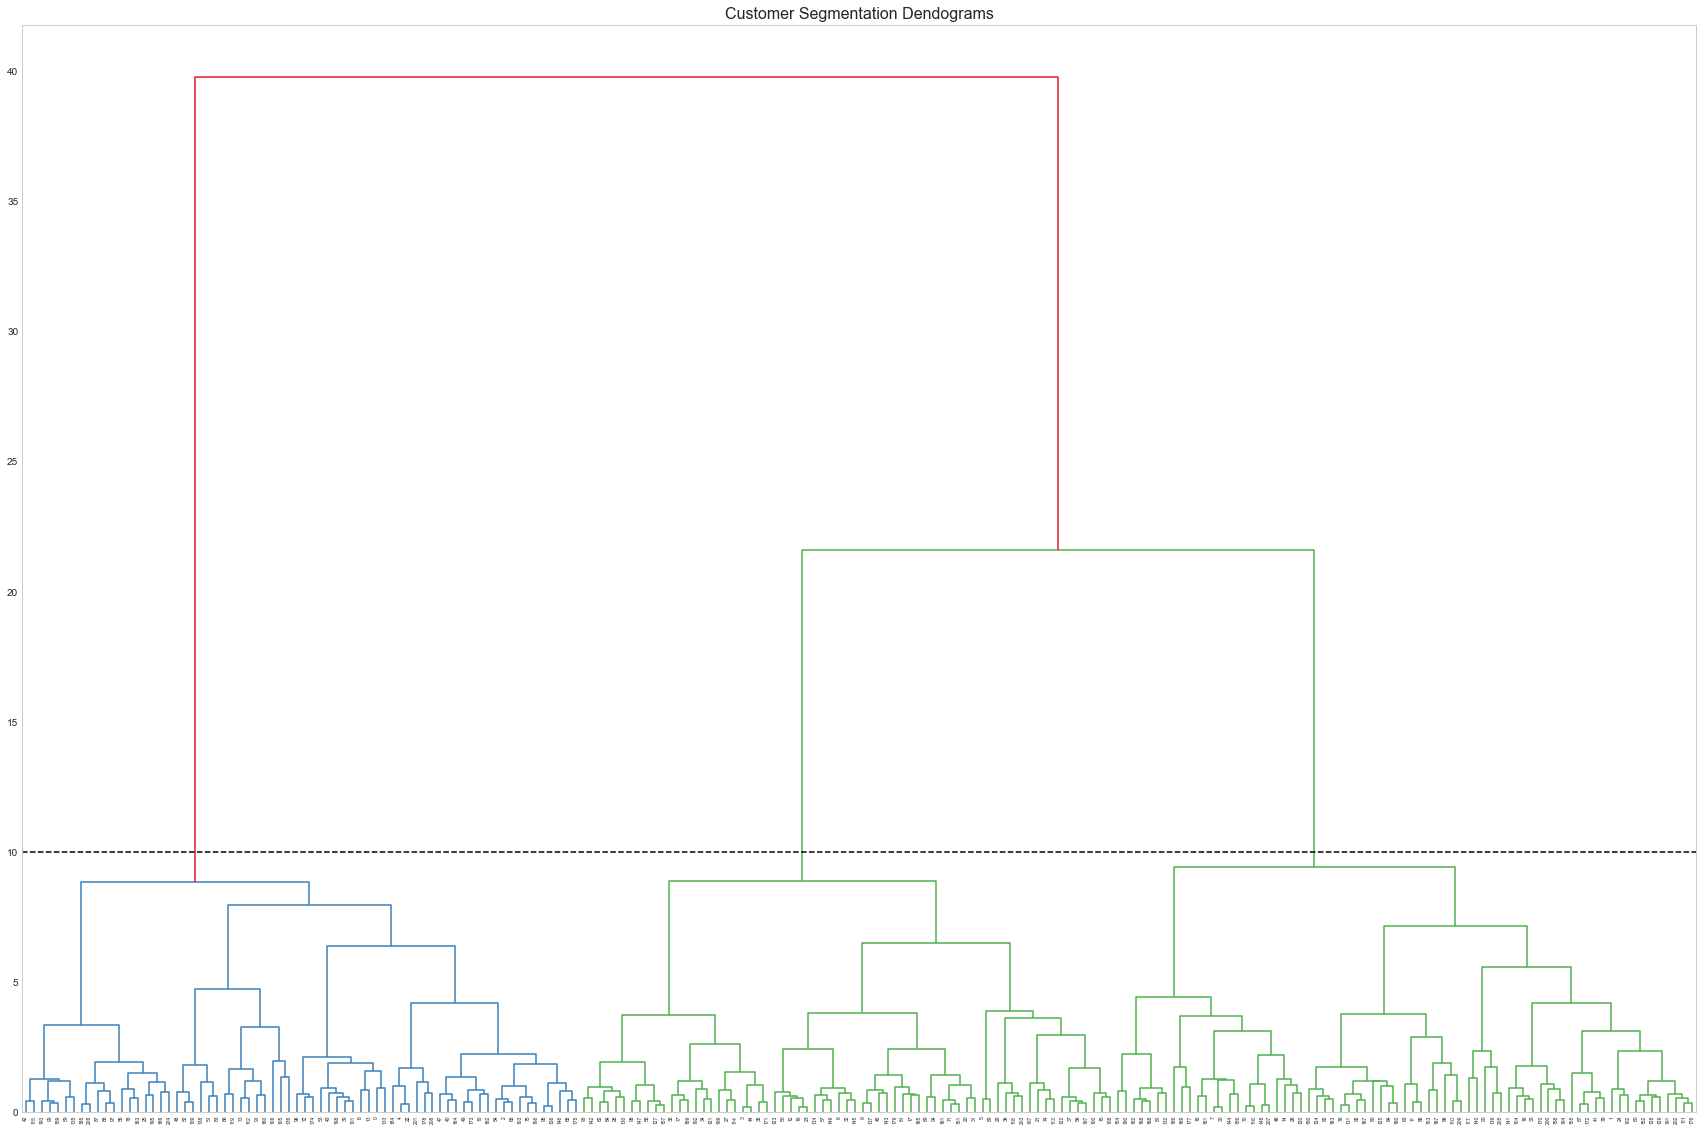

In [51]:
plt.figure(figsize=(30, 20))
plt.title("Customer Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(10, color='black', linestyle='--')
plt.grid(visible=False)
plt.show()

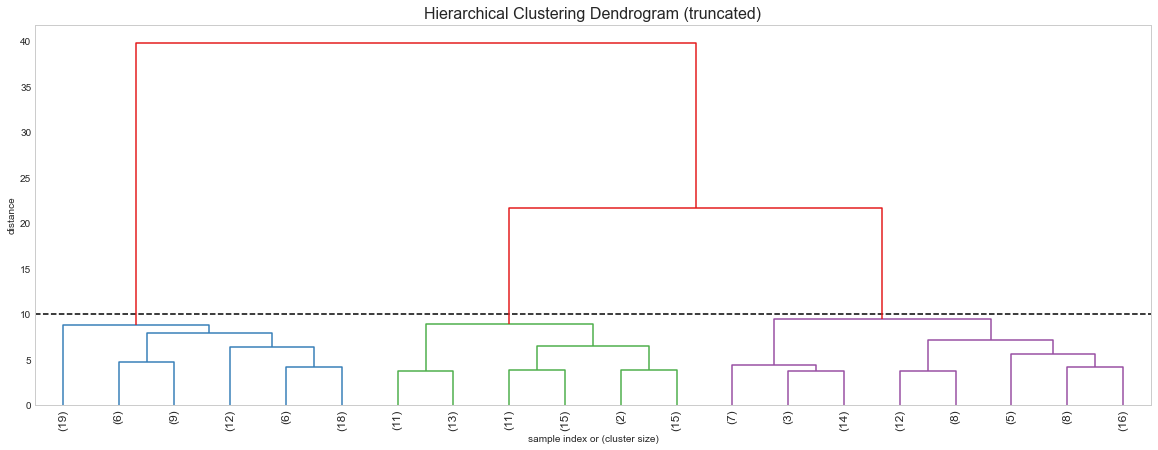

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.axhline(10, color='black', linestyle='--')
plt.grid(visible=False)
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10
    
)
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster = cluster.fit_predict(df_scaled)

In [54]:
data_cluster = df.copy()

In [55]:
data_cluster['cluster'] = cluster

In [56]:
data_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [57]:
data_cluster['cluster'].value_counts()

0    73
1    70
2    67
Name: cluster, dtype: int64

In [58]:
data_cluster[data_cluster['cluster']==0].mean()

spending                        14.199041
advance_payments                14.233562
probability_of_full_payment      0.879190
current_balance                  5.478233
credit_limit                     3.226452
min_payment_amt                  2.612181
max_spent_in_single_shopping     5.086178
cluster                          0.000000
dtype: float64

In [59]:
data_cluster[data_cluster['cluster']==1].mean()

spending                        18.371429
advance_payments                16.145429
probability_of_full_payment      0.884400
current_balance                  6.158171
credit_limit                     3.684629
min_payment_amt                  3.639157
max_spent_in_single_shopping     6.017371
cluster                          1.000000
dtype: float64

In [60]:
data_cluster[data_cluster['cluster']==2].mean()

spending                        11.872388
advance_payments                13.257015
probability_of_full_payment      0.848072
current_balance                  5.238940
credit_limit                     2.848537
min_payment_amt                  4.949433
max_spent_in_single_shopping     5.122209
cluster                          2.000000
dtype: float64

In [61]:
data_cluster.groupby('cluster').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209


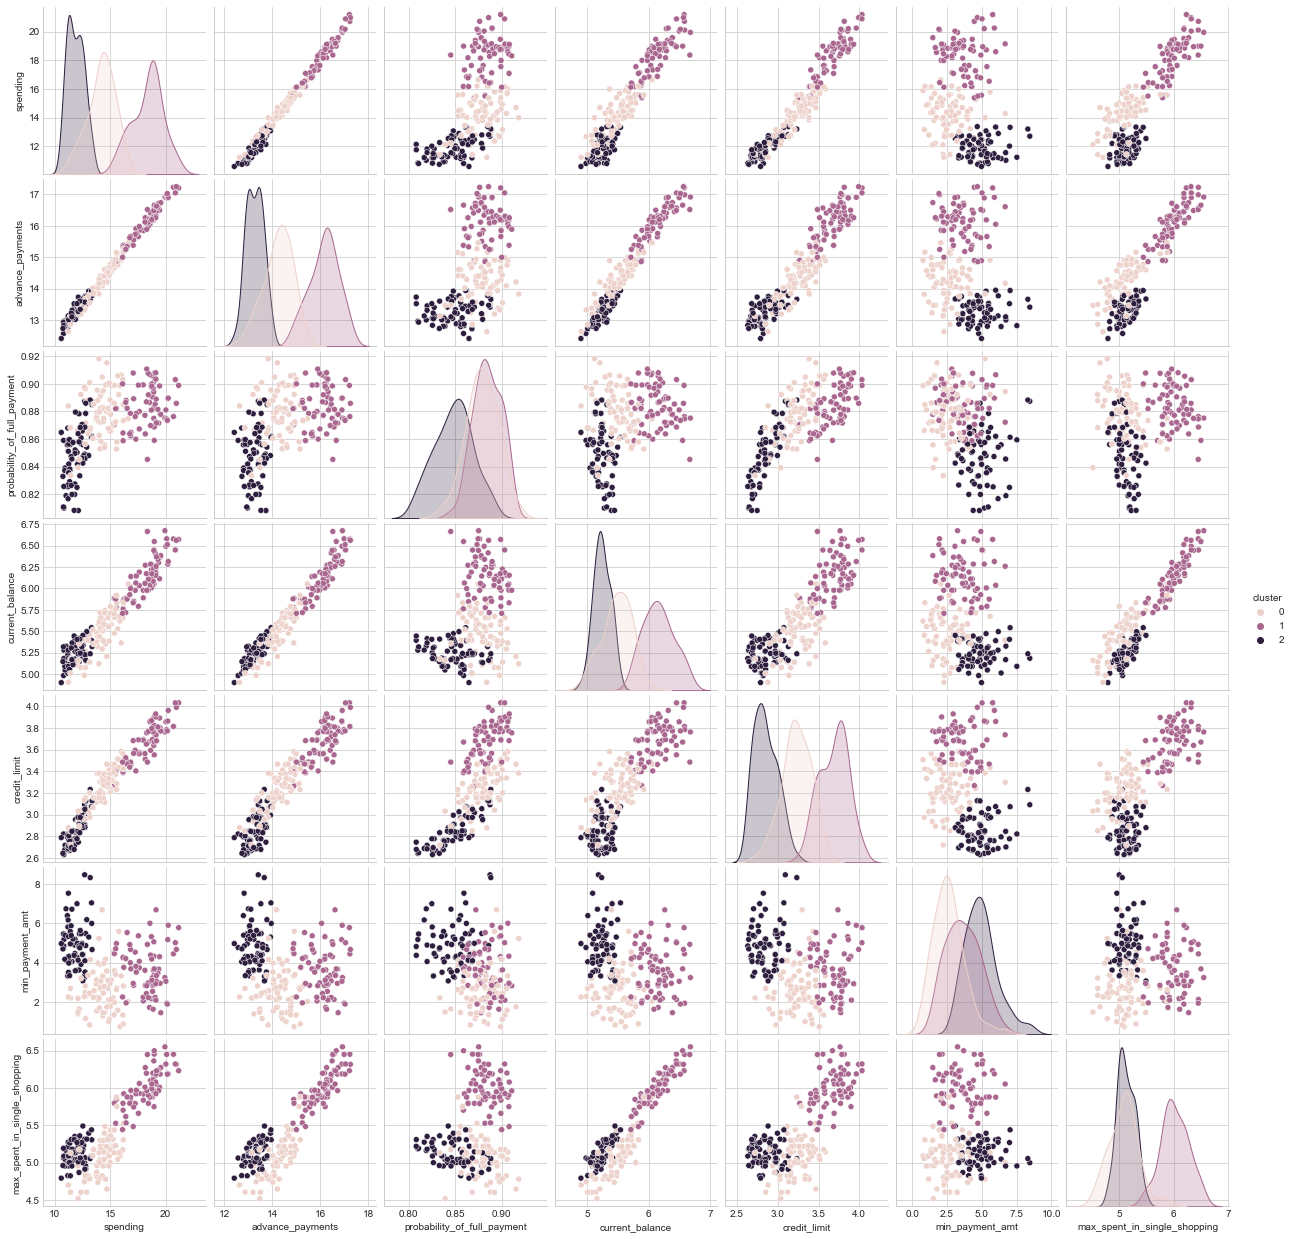

In [62]:
sns.pairplot(data_cluster,hue='cluster')
sns.set_palette("Set1")

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Report must contain logical and correct explanations for choosing the optimum clusters using the elbow method. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs. 

In [63]:
from sklearn.cluster import KMeans

In [64]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
label_1 = k_means.labels_
label_1

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [65]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
label_2 = k_means.labels_
label_2

array([1, 0, 1, 3, 1, 3, 3, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3,
       1, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 1,
       1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 0, 3, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 0, 1,
       2, 0, 1, 3, 3, 2, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0,
       0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 0, 1, 1, 1,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 1, 0, 2, 1, 3,
       1, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2])

In [66]:

wss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(df_scaled)
    wss.append(kmeans.inertia_)

In [67]:
for i in range(2,11):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 2 clusters is 659.1717544870407
The WSS value for 3 clusters is 430.6589731513006
The WSS value for 4 clusters is 371.30172127754213
The WSS value for 5 clusters is 327.96082400790306
The WSS value for 6 clusters is 290.59003059682186
The WSS value for 7 clusters is 264.8315308747815
The WSS value for 8 clusters is 240.68372595015984
The WSS value for 9 clusters is 220.85285825594738
The WSS value for 10 clusters is 206.38291036015787


In [68]:
#These are the wss values.We fill find the sudden drop in wss values to find the optimum number of cluster.

In [69]:
#We can also use elbow curve to find the optimum number of clusters required.

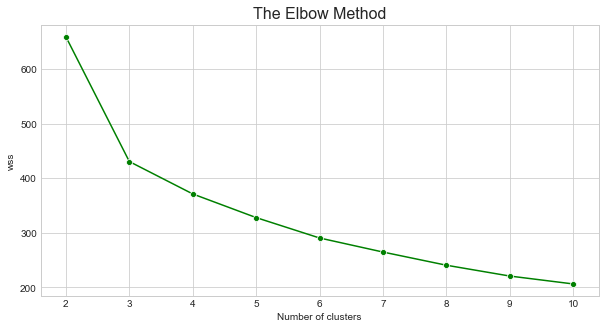

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(x = range(2,11),y=wss,marker='o',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.show()

In [71]:
#K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set.
#3 clusters were identified as an optimum number.

In [72]:
data_kmeans = data_cluster.copy()

In [73]:
data_kmeans['kmeans_cluster_4']= label_2
data_kmeans['kmeans_cluster_3']= label_1
data_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,kmeans_cluster_4,kmeans_cluster_3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,3,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


In [74]:
data_kmeans_1 = data_kmeans.copy()

In [75]:
data_kmeans_1.drop(['cluster','kmeans_cluster_4'],axis=1,inplace=True)

In [76]:
data_kmeans_1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,kmeans_cluster_3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [77]:
data_kmeans_1.groupby('kmeans_cluster_3').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
kmeans_cluster_3,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803


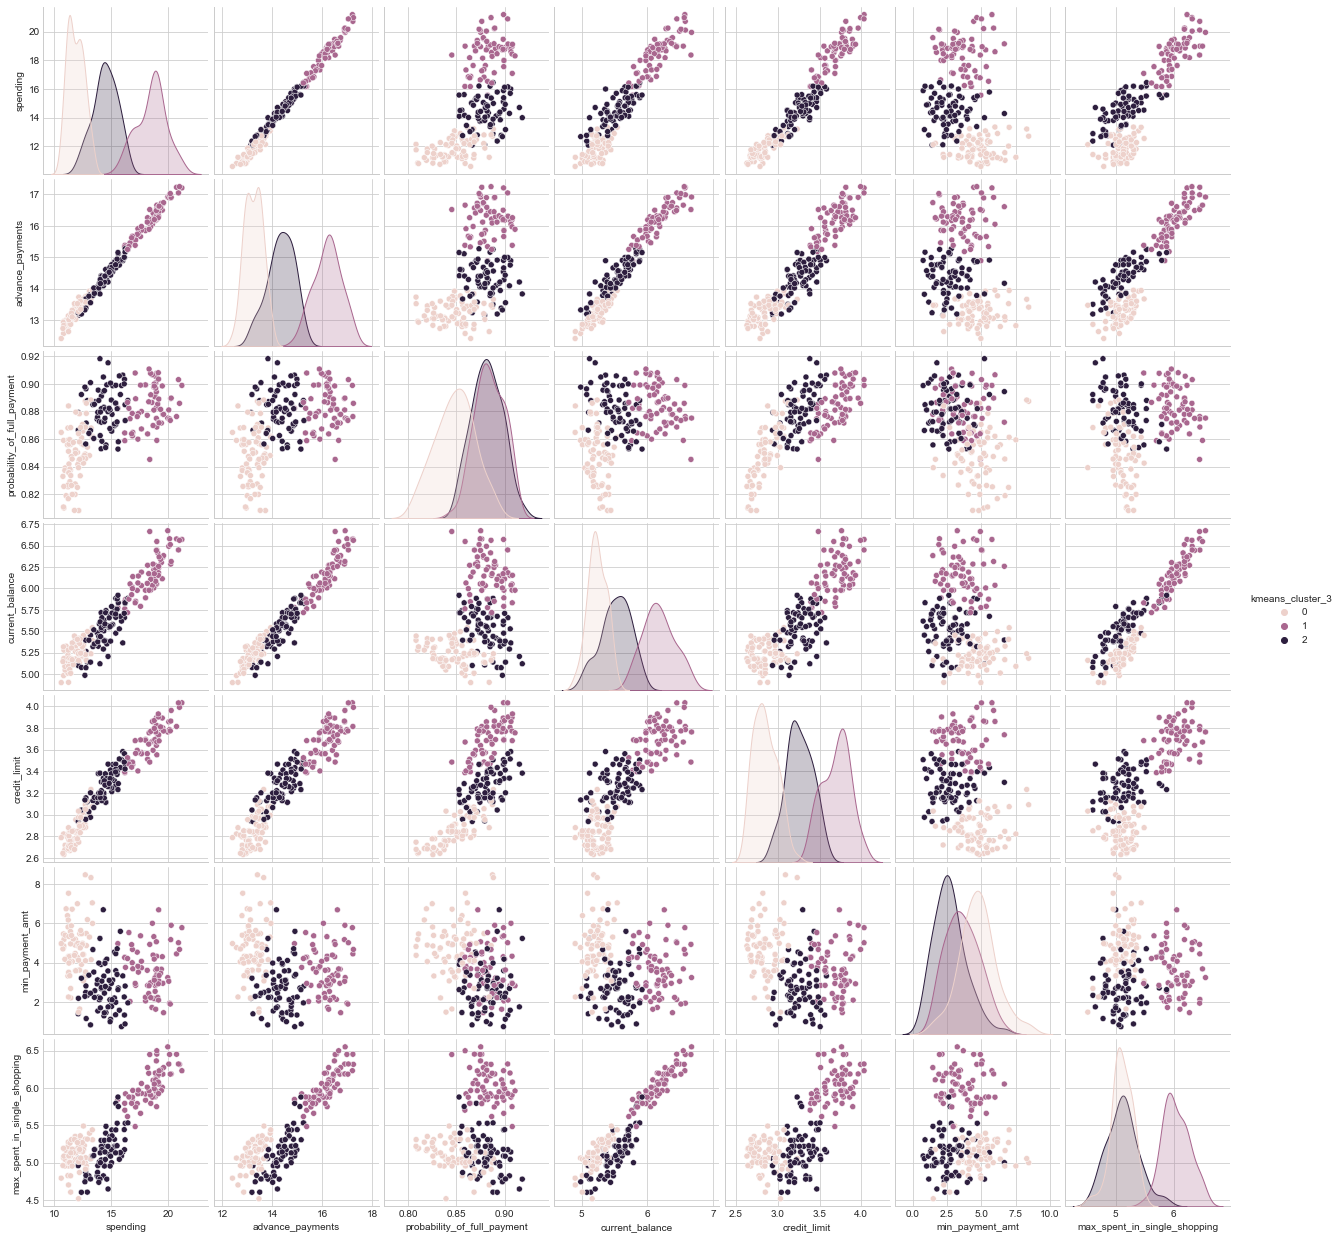

In [78]:
sns.pairplot(data_kmeans_1,hue='kmeans_cluster_3')
sns.set_palette("Set1")

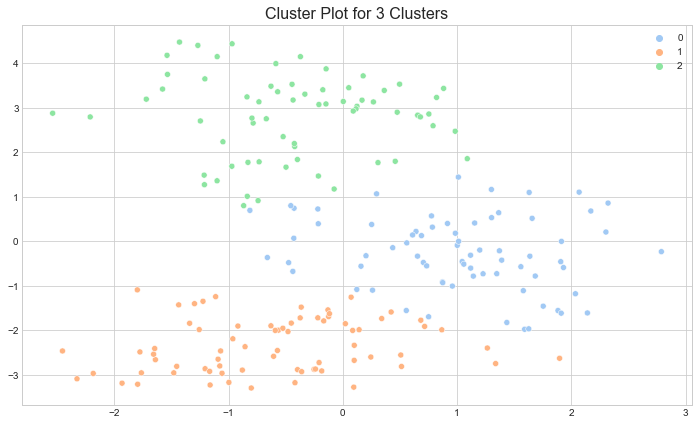

In [79]:
from sklearn.decomposition import PCA 
pca_2 = PCA(2) 
plot_columns = pca_2.fit_transform(df_scaled) 
plt.figure(figsize=(12,7)) 
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=
3, random_state=0).fit(df_scaled).labels_, palette='pastel',legend=True) 
plt.title('Cluster Plot for 3 Clusters') 
plt.show() 

#### 1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable. 

In [77]:
# The data can be splitted to 3 clusters .The first can 

# Problem 2: CART-RF

## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.

### 2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [78]:
insu_data = pd.read_csv(r'C:\Users\User\Downloads\insurance_part2_data.csv')

In [79]:
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [80]:
insu_data.shape

(3000, 10)

In [81]:
insu_data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [82]:
insu_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [83]:
insu_data['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [84]:
insu_data['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [85]:
insu_data['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [86]:
insu_data['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [87]:
insu_data['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [88]:
insu_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
num = []

cat = []

for i in insu_data.columns:
  if insu_data[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)

In [90]:
num

['Age', 'Commision', 'Duration', 'Sales']

In [91]:
cat

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [92]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(insu_data[column].describe(),end=' ') 
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(insu_data[column], kde=True, color='g');
    plt.title('Distribution plot of '+ column)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=insu_data[column])
    plt.title('Box plot of '+ column)
    plt.show()

In [93]:
len(num)

4

In [94]:
data_num = list(num)

In [95]:
data_num

['Age', 'Commision', 'Duration', 'Sales']

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

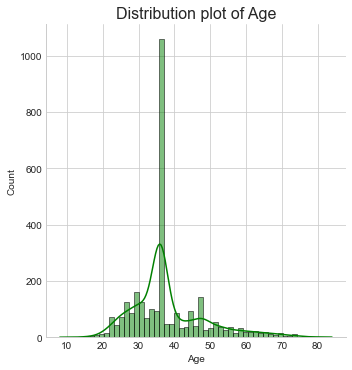

BoxPlot of Age
----------------------------------------------------------------------------


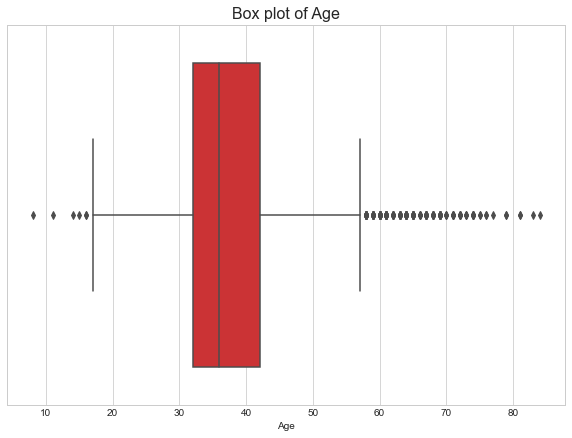

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

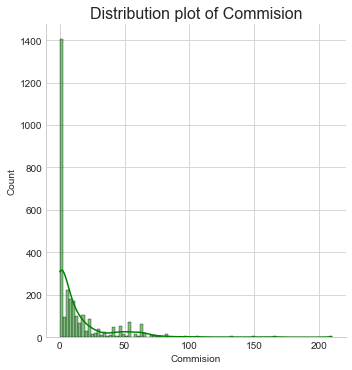

BoxPlot of Commision
----------------------------------------------------------------------------


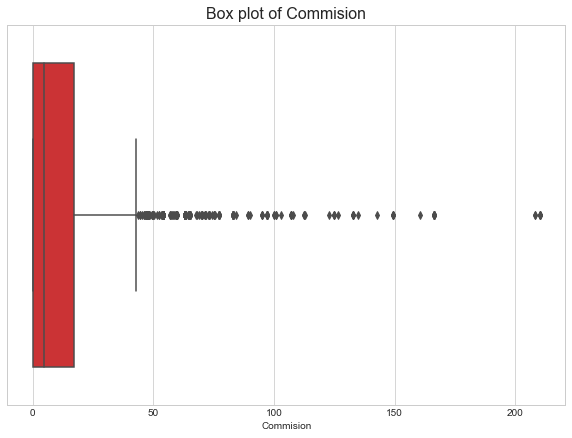

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

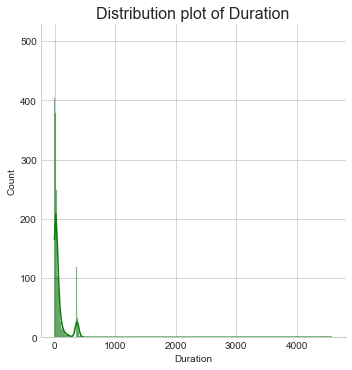

BoxPlot of Duration
----------------------------------------------------------------------------


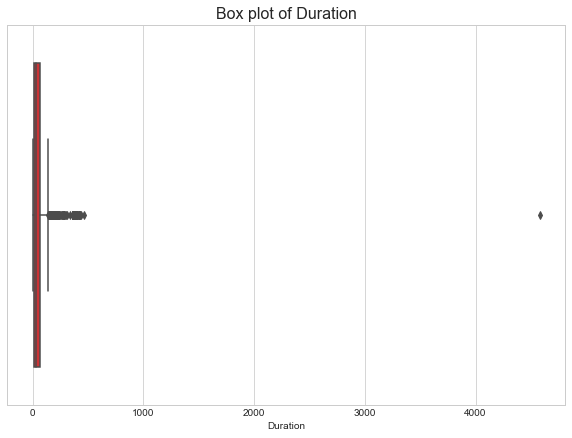

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


<Figure size 720x504 with 0 Axes>

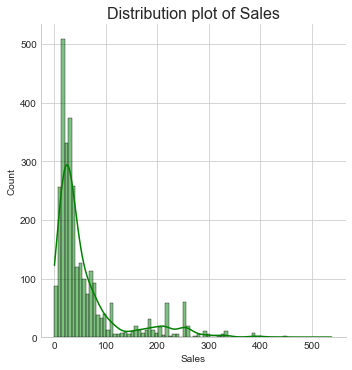

BoxPlot of Sales
----------------------------------------------------------------------------


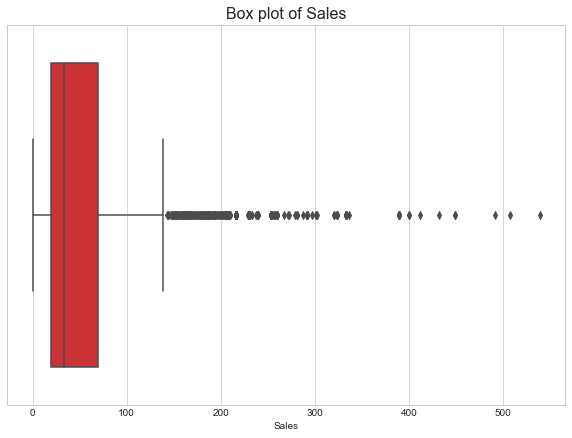

In [96]:
for x in data_num:
    univariateAnalysis_numeric(x)

In [97]:
#BOxplot for numnerical data

<AxesSubplot:xlabel='Sales'>

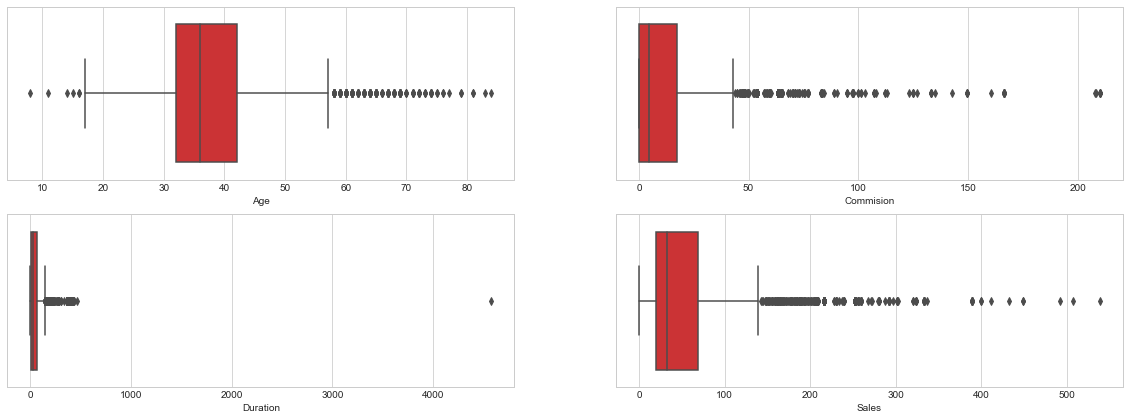

In [98]:
plt.figure(figsize=(20,7))
plt.subplot(2,2,1)
sns.boxplot(data = insu_data,x = insu_data.columns[0])
plt.subplot(2,2,2)
sns.boxplot(data = insu_data,x = insu_data.columns[4])
plt.subplot(2,2,3)
sns.boxplot(data = insu_data,x = insu_data.columns[6])
plt.subplot(2,2,4)
sns.boxplot(data = insu_data,x = insu_data.columns[7])

In [99]:
outlier_percentage_df(insu_data,num)

,% OUTLIERS
Duration,12.7333
Commision,12.0667
Sales,11.7667
Age,6.8000


In [100]:
#Distribution plot for numerical data

<AxesSubplot:xlabel='Sales', ylabel='Count'>

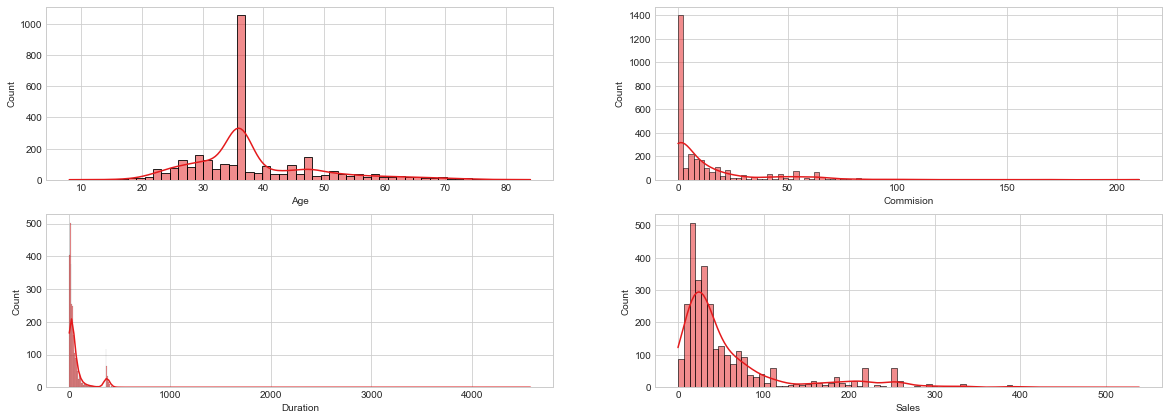

In [101]:
plt.figure(figsize=(20,7))
plt.subplot(2,2,1)
sns.histplot(data = insu_data,x = insu_data.columns[0],kde=True)
plt.subplot(2,2,2)
sns.histplot(data = insu_data,x = insu_data.columns[4],kde=True)
plt.subplot(2,2,3)
sns.histplot(data = insu_data,x = insu_data.columns[6],kde=True)
plt.subplot(2,2,4)
sns.histplot(data = insu_data,x = insu_data.columns[7],kde=True)

In [102]:
#Count plot for categorical columns

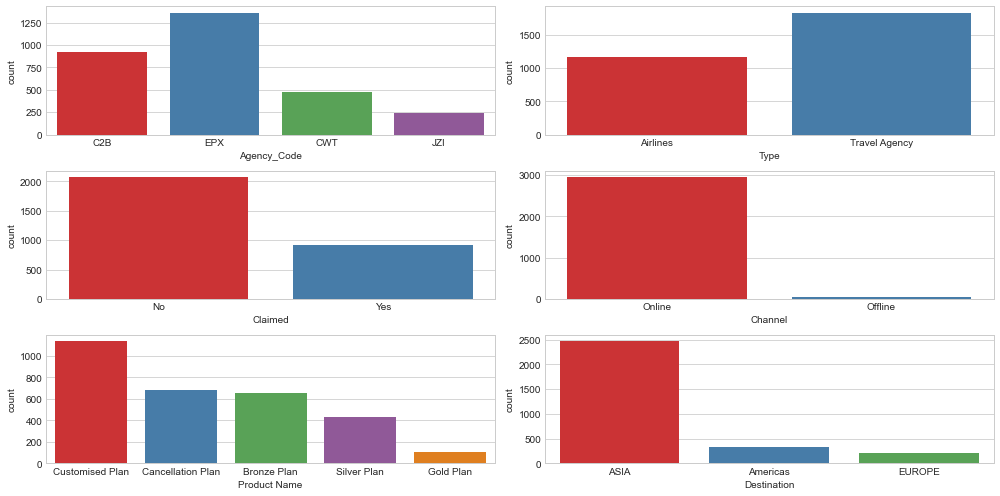

In [103]:
plt.figure(figsize=(14,7))
plt.subplot(3,2,1)
sns.countplot(data = insu_data,x = insu_data.columns[1])
plt.subplot(3,2,2)
sns.countplot(data = insu_data,x = insu_data.columns[2])
plt.subplot(3,2,3)
sns.countplot(data = insu_data,x = insu_data.columns[3])
plt.subplot(3,2,4)
sns.countplot(data = insu_data,x = insu_data.columns[5])
plt.subplot(3,2,5)
sns.countplot(data = insu_data,x = insu_data.columns[8])
plt.subplot(3,2,6)
sns.countplot(data = insu_data,x = insu_data.columns[9])
plt.tight_layout()

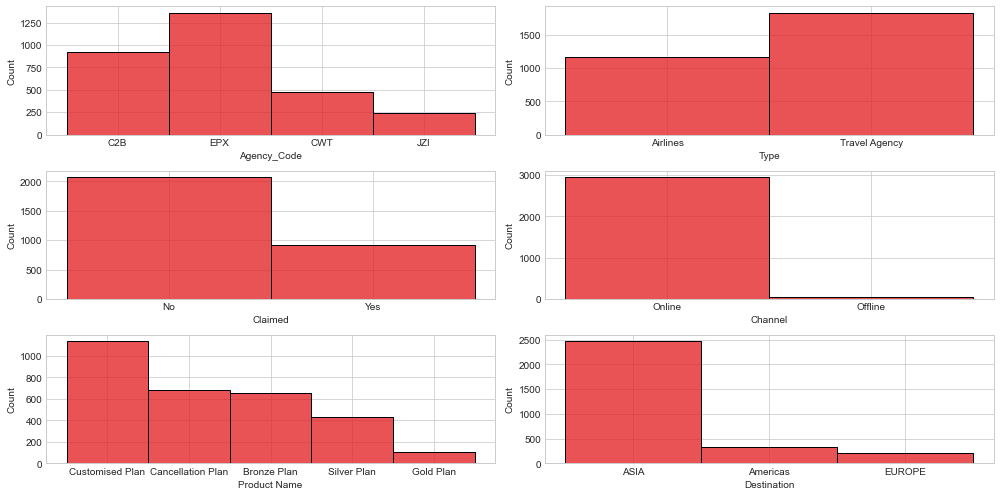

In [104]:
plt.figure(figsize=(14,7))
plt.subplot(3,2,1)
sns.histplot(data = insu_data,x = insu_data.columns[1])
plt.subplot(3,2,2)
sns.histplot(data = insu_data,x = insu_data.columns[2])
plt.subplot(3,2,3)
sns.histplot(data = insu_data,x = insu_data.columns[3])
plt.subplot(3,2,4)
sns.histplot(data = insu_data,x = insu_data.columns[5])
plt.subplot(3,2,5)
sns.histplot(data = insu_data,x = insu_data.columns[8])
plt.subplot(3,2,6)
sns.histplot(data = insu_data,x = insu_data.columns[9])
plt.tight_layout()

In [105]:
#Bi-variate analysis

<AxesSubplot:xlabel='Type', ylabel='Sales'>

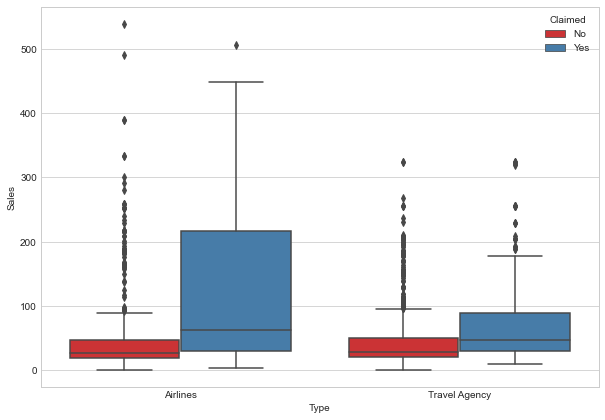

In [106]:
sns.boxplot(data = insu_data, x='Type',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

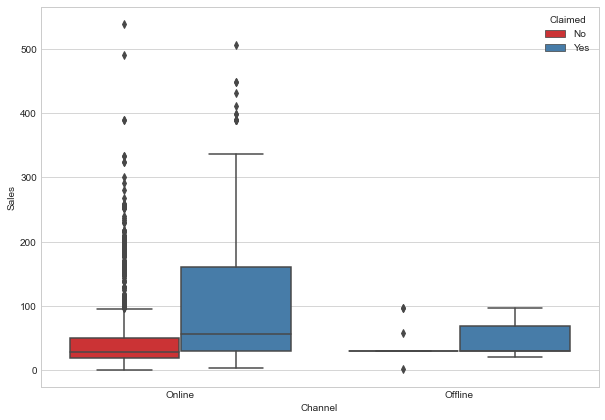

In [107]:
sns.boxplot(data = insu_data, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

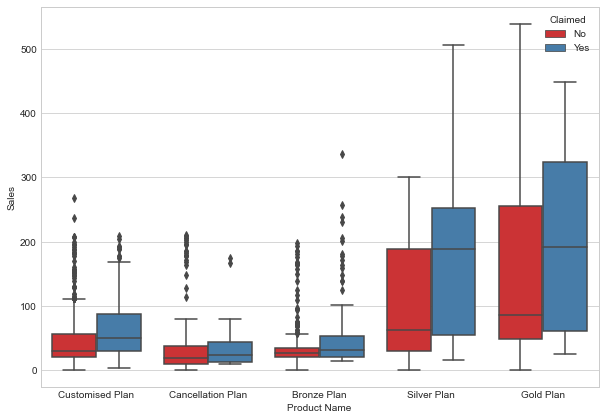

In [108]:
sns.boxplot(data = insu_data, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

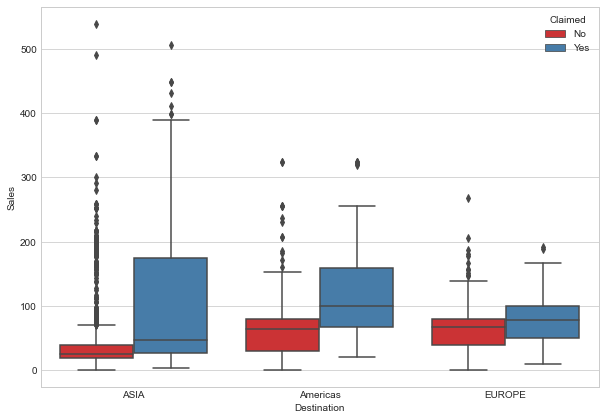

In [109]:
sns.boxplot(data = insu_data, x='Destination',y='Sales', hue='Claimed')

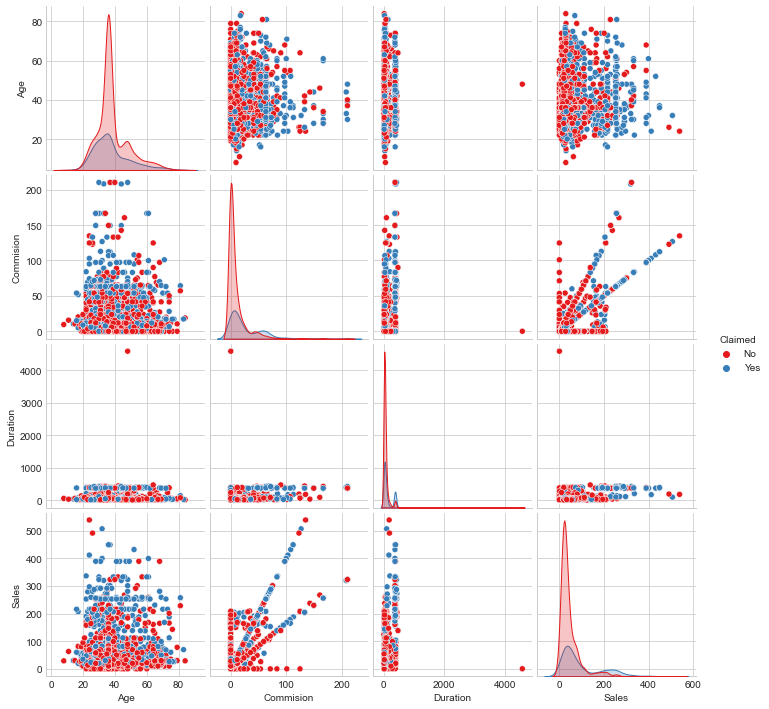

In [110]:
sns.pairplot(insu_data,hue='Claimed')
sns.set_palette("Set2")

In [111]:
insu_data.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


<AxesSubplot:>

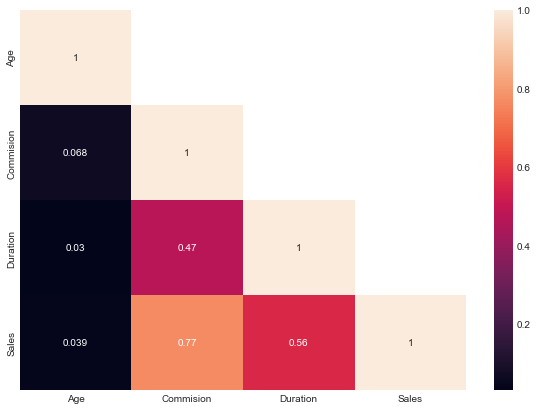

In [112]:
sns.heatmap(insu_data.corr(),annot=True,mask=np.triu(insu_data.corr(),1))

In [113]:
for x in num:
    print(x)

Age
Commision
Duration
Sales


In [114]:
def Five_number_Sumamry_1(column):    
    print('Five number summary of -',column)
    five_num = [insu_data[column].quantile(0), 
            insu_data[column].quantile(0.25), 
            insu_data[column].quantile(0.50), 
            insu_data[column].quantile(0.75), 
            insu_data[column].quantile(1)]
    print ('Minimum:',five_num[0],'\n25%:',five_num[1],'\n50% or Median:',five_num[2],'\n75%:',five_num[3],'\nMaximum:',five_num[4])
    print('IQR:',stats.iqr(insu_data[column])) 
    print("----------------------------------------------------------------------------")

In [115]:
for x in num:
    Five_number_Sumamry_1(x)

Five number summary of - Age
Minimum: 8.0 
25%: 32.0 
50% or Median: 36.0 
75%: 42.0 
Maximum: 84.0
IQR: 10.0
----------------------------------------------------------------------------
Five number summary of - Commision
Minimum: 0.0 
25%: 0.0 
50% or Median: 4.63 
75%: 17.235 
Maximum: 210.21
IQR: 17.235
----------------------------------------------------------------------------
Five number summary of - Duration
Minimum: -1.0 
25%: 11.0 
50% or Median: 26.5 
75%: 63.0 
Maximum: 4580.0
IQR: 52.0
----------------------------------------------------------------------------
Five number summary of - Sales
Minimum: 0.0 
25%: 20.0 
50% or Median: 33.0 
75%: 69.0 
Maximum: 539.0
IQR: 49.0
----------------------------------------------------------------------------


In [116]:
for i, col in enumerate(num):
    min = insu_data[col].quantile(0.25)-(1.5*(stats.iqr(insu_data[col])))
    max = insu_data[col].quantile(0.75)+(1.5*(stats.iqr(insu_data[col])))
    print('Calcluated mininmum for',col,'is', min ,'\nCalcluated maximum for',col,'is', round(max,2))
    eq = insu_data[insu_data[col]<min].count()[col]/insu_data[col].count()+insu_data[insu_data[col]> max].count()[col]/insu_data[col].count()
    print('The outlier percentage in',col,'is',round((eq)*100,2),'%')
    print("----------------------------------------------------------------------------")

Calcluated mininmum for Age is 17.0 
Calcluated maximum for Age is 57.0
The outlier percentage in Age is 6.8 %
----------------------------------------------------------------------------
Calcluated mininmum for Commision is -25.8525 
Calcluated maximum for Commision is 43.09
The outlier percentage in Commision is 12.07 %
----------------------------------------------------------------------------
Calcluated mininmum for Duration is -67.0 
Calcluated maximum for Duration is 141.0
The outlier percentage in Duration is 12.73 %
----------------------------------------------------------------------------
Calcluated mininmum for Sales is -53.5 
Calcluated maximum for Sales is 142.5
The outlier percentage in Sales is 11.77 %
----------------------------------------------------------------------------


In [117]:
insu_data[insu_data['Age'] < 17]['Age']

1273    14
1558     8
1673    16
1940    15
2724    11
2987    16
Name: Age, dtype: int64

In [118]:
insu_data[insu_data['Age'] < 17].count()['Age']

6

In [119]:
insu_data[insu_data['Duration']> 141].count()['Duration']/insu_data['Duration'].count()

0.12733333333333333

In [120]:
insu_data[insu_data['Duration']< -67].count()['Duration']/insu_data['Duration'].count()

0.0

In [121]:
insu_data[num].skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

### 2.2 Data Split: Split the data into test and train(0.5 pts), build classification model CART (2.5 pts), Random Forest (2.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model. 

In [122]:
insu_data.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [123]:
#Convering object to categorical or code

In [124]:
for feature in insu_data.columns: 
    if insu_data[feature].dtype == 'object': 
        insu_data[feature] = pd.Categorical(insu_data[feature]).codes

In [125]:
insu_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [126]:
X = insu_data.drop('Claimed',axis=1)
y = insu_data.pop('Claimed')

In [127]:
#Train_test_split

In [128]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [129]:
X_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1045,36,2,1,0.00,1,30,20.00,2,0
2717,36,2,1,0.00,1,139,42.00,2,1
2835,28,0,0,46.96,1,367,187.85,4,0
2913,28,0,0,12.13,1,29,48.50,4,0
959,48,1,1,18.62,1,53,49.00,3,0


In [130]:
X_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1957,22,1,1,28.50,1,28,75.0,0,2
2087,55,0,0,6.63,1,24,26.5,0,0
1394,29,0,0,4.00,1,33,16.0,0,0
1520,27,0,0,15.88,1,40,63.5,4,0
1098,36,2,1,0.00,1,35,27.0,1,0


In [131]:
train_labels.head()

1045    0
2717    0
2835    1
2913    1
959     0
Name: Claimed, dtype: int8

In [132]:
test_labels.head()

1957    0
2087    1
1394    1
1520    1
1098    0
Name: Claimed, dtype: int8

### Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(random_state=1)

In [135]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_data_File = open('d:\insurance_data.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_data_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_data_File.close()

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,4,5,6,7, 8, 9, 10],
    'min_samples_leaf': [5,10,15, 20, 25],
    'min_samples_split': [30,45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state=1)



In [137]:
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'min_samples_split': [30, 45, 60, 75]})

In [138]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 45}

In [139]:
best_grid_dt = grid_search.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=45,
                       random_state=1)

In [140]:
#Important features
print (pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.597721
Sales         0.253110
Product Name  0.076348
Duration      0.035679
Commision     0.029747
Type          0.007395
Age           0.000000
Channel       0.000000
Destination   0.000000


In [141]:
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=np.inf)

In [142]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [143]:
ytrain_predict_dt

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [144]:
ytest_predict_dt

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

### Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
param_grid = {
    'max_depth': [3,4,5,6,7, 8,9,10],
    'min_samples_leaf': [5,10,15,20, 25,30,35],
    'min_samples_split': [30,45,60, 75],
    'n_estimators': [301,501]
}

rfcl = RandomForestClassifier(oob_score=True,random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [255]:
grid_search_rf.fit(X_train, train_labels)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35],
                         'min_samples_split': [30, 45, 60, 75],
                         'n_estimators': [301, 501]})

In [256]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=30,
                       n_estimators=301, oob_score=True, random_state=1)

In [257]:
#Important features
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.234423
Product Name  0.197882
Sales         0.175133
Commision     0.143833
Duration      0.099229
Age           0.071230
Type          0.063419
Destination   0.011780
Channel       0.003072


In [258]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [259]:
ytrain_predict_rf

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [260]:
ytest_predict_rf

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.



### Decision tree 

#### Train data

In [261]:
from sklearn.metrics import accuracy_score 

In [262]:
accuracy_score(train_labels,ytrain_predict_dt)

0.7928571428571428

In [263]:
from sklearn.metrics import classification_report,confusion_matrix

In [264]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[1263,  208],
       [ 227,  402]], dtype=int64)

In [265]:
#Train Data Accuracy
best_grid_dt.score(X_train,train_labels) 

0.7928571428571428

In [266]:
print(classification_report(train_labels, ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



AUC: 0.831


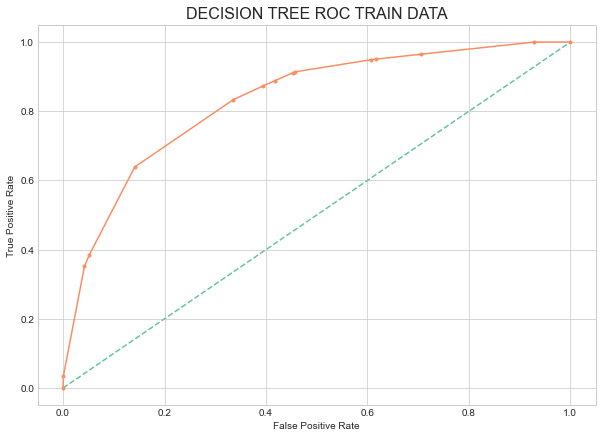

In [267]:
# predict probabilities
probs = best_grid_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DECISION TREE ROC TRAIN DATA')
# show the plot
plt.show()

### Test data 

In [268]:
confusion_matrix(test_labels, ytest_predict_dt)

array([[536,  69],
       [128, 167]], dtype=int64)

In [269]:
#Test Data Accuracy
best_grid_dt.score(X_test,test_labels)

0.7811111111111111

In [270]:
print(classification_report(test_labels, ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       605
           1       0.71      0.57      0.63       295

    accuracy                           0.78       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.77      0.78      0.77       900



AUC: 0.795


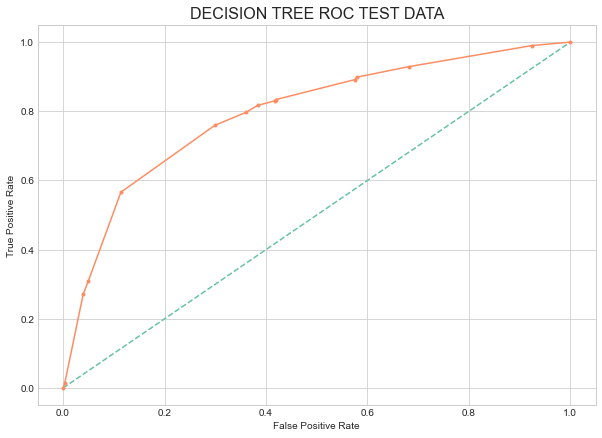

In [271]:
# predict probabilities
probs = best_grid_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DECISION TREE ROC TEST DATA')
# show the plot
plt.show()

### Random forest

### Train data 

In [272]:
#oob_score

In [273]:
best_grid_rf.oob_score_

0.7928571428571428

In [274]:
from sklearn.metrics import accuracy_score 

In [275]:
accuracy_score(train_labels,ytrain_predict_rf)

0.8257142857142857

In [276]:
from sklearn.metrics import classification_report,confusion_matrix

In [277]:
confusion_matrix(train_labels, ytrain_predict_rf)

array([[1343,  128],
       [ 238,  391]], dtype=int64)

In [278]:
#Train Data Accuracy
best_grid_rf.score(X_train,train_labels) 

0.8257142857142857

In [279]:
print(classification_report(train_labels, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1471
           1       0.75      0.62      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



AUC: 0.877


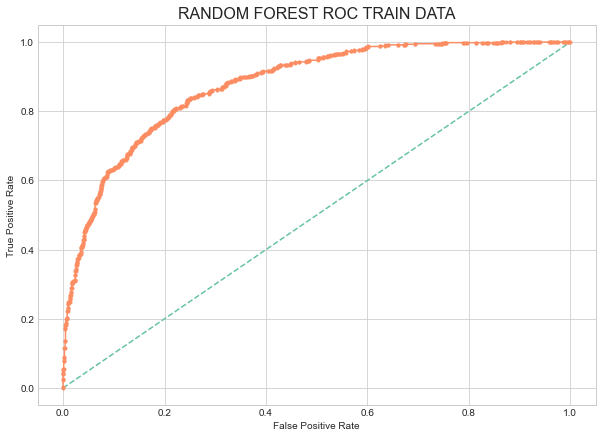

In [280]:
# predict probabilities
probs = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RANDOM FOREST ROC TRAIN DATA')
# show the plot
plt.show()

### Test data 

In [281]:
confusion_matrix(test_labels, ytest_predict_rf)

array([[553,  52],
       [148, 147]], dtype=int64)

In [282]:
#Test Data Accuracy
best_grid_rf.score(X_test,test_labels)

0.7777777777777778

In [283]:
print(classification_report(test_labels, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.74      0.50      0.60       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



AUC: 0.823


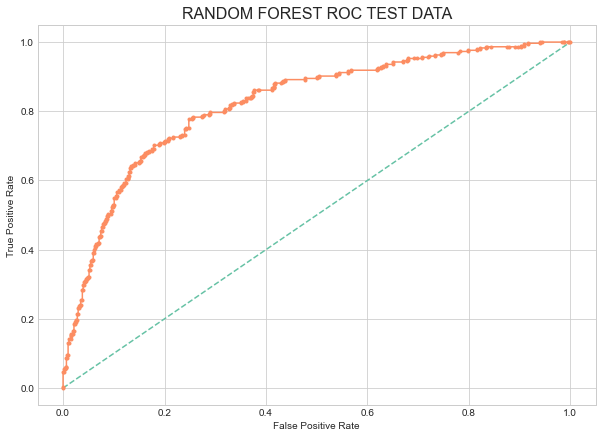

In [284]:
# predict probabilities
probs = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RANDOM FOREST ROC TEST DATA')
# show the plot
plt.show()

### 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model. 

In [290]:
dt_train_class_report = print(classification_report(train_labels, ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [291]:
dt_test_class_report = print(classification_report(test_labels, ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       605
           1       0.71      0.57      0.63       295

    accuracy                           0.78       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.77      0.78      0.77       900



In [292]:
rf_train_class_report = print(classification_report(train_labels, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1471
           1       0.75      0.62      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



In [293]:
rf_test_class_report = print(classification_report(test_labels, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.74      0.50      0.60       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



In [294]:
rf_test_class_report=classification_report(test_labels, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_test_class_report).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.74
rf_test_recall  0.5
rf_test_f1  0.6


### 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific. 

In [299]:
insu_data_copy = pd.read_csv(r'C:\Users\User\Downloads\insurance_part2_data.csv')

In [306]:
insu_data_copy.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales', 'Product Name', 'Destination'], dtype='object')

In [303]:
#Important features
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.234423
Product Name  0.197882
Sales         0.175133
Commision     0.143833
Duration      0.099229
Age           0.071230
Type          0.063419
Destination   0.011780
Channel       0.003072


In [312]:
insu_data_copy.groupby('Agency_Code')['Claimed'].value_counts()

Agency_Code  Claimed
C2B          Yes         560
             No          364
CWT          No          331
             Yes         141
EPX          No         1172
             Yes         193
JZI          No          209
             Yes          30
Name: Claimed, dtype: int64

In [372]:
insu_data_copy.groupby('Agency_Code')['Claimed'].value_counts().sum()

3000

Agency_Code
C2B     924
CWT     472
EPX    1365
JZI     239
Name: Claimed, dtype: int64

In [368]:
(560/924)*100

60.60606060606061

In [369]:
(141/472)*100

29.8728813559322

In [370]:
(193/1365)*100

14.139194139194139

In [371]:
(30/239)*100

12.552301255230125

In [373]:
(560+141+193+30)/3000

0.308

In [314]:
insu_data_copy.groupby('Product Name')['Claimed'].value_counts()

Product Name       Claimed
Bronze Plan        No         399
                   Yes        251
Cancellation Plan  No         635
                   Yes         43
Customised Plan    No         882
                   Yes        254
Gold Plan          Yes         70
                   No          39
Silver Plan        Yes        306
                   No         121
Name: Claimed, dtype: int64

In [358]:
251/(399+251)*100

38.61538461538462

In [360]:
43/(43+635)*100

6.342182890855458

In [361]:
254/(254+882)*100

22.359154929577464

In [363]:
70/(70+39)*100

64.22018348623854

In [364]:
30

71.66276346604215

In [346]:
insu_data_copy.groupby('Claimed').count()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
Claimed,,,,,,,,,
No,2076,2076,2076,2076,2076,2076,2076,2076,2076
Yes,924,924,924,924,924,924,924,924,924


In [348]:
924/(2076+924)*100

30.8

In [325]:
insu_data_copy.groupby('Type')['Claimed'].value_counts()

Type           Claimed
Airlines       Yes         590
               No          573
Travel Agency  No         1503
               Yes         334
Name: Claimed, dtype: int64

In [326]:
insu_data_copy.groupby('Destination')['Claimed'].value_counts()

Destination  Claimed
ASIA         No         1691
             Yes         774
Americas     No          232
             Yes          88
EUROPE       No          153
             Yes          62
Name: Claimed, dtype: int64

In [327]:
insu_data_copy.groupby('Channel')['Claimed'].value_counts()

Channel  Claimed
Offline  No           29
         Yes          17
Online   No         2047
         Yes         907
Name: Claimed, dtype: int64

In [380]:
#offline

In [381]:
17/(17+29)*100

36.95652173913043

In [382]:
907/(2047+907)*100

30.704129993229518

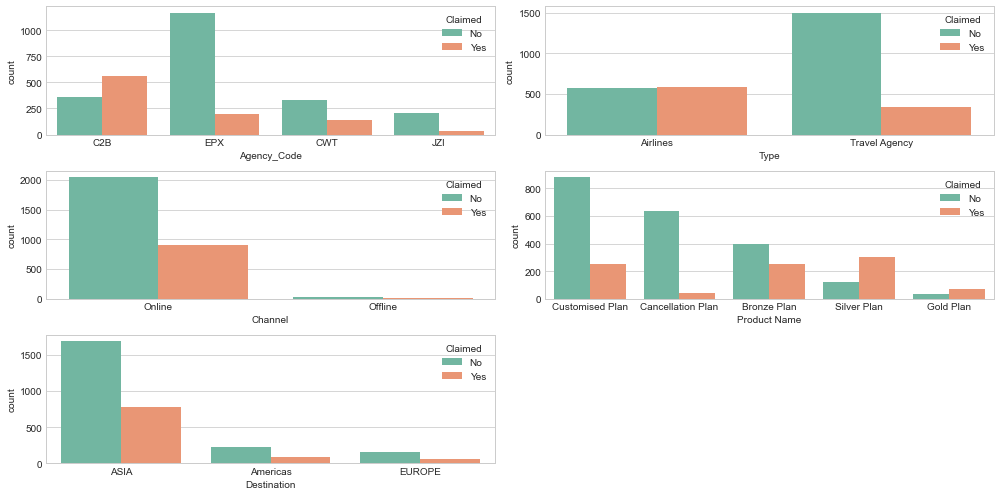

In [379]:
plt.figure(figsize=(14,7))
plt.subplot(3,2,1)
sns.countplot(data = insu_data_copy,x = insu_data_copy.columns[1],hue='Claimed')
plt.subplot(3,2,2)
sns.countplot(data = insu_data_copy,x = insu_data_copy.columns[2],hue='Claimed')
plt.subplot(3,2,3)
sns.countplot(data = insu_data_copy,x = insu_data_copy.columns[5],hue='Claimed')
plt.subplot(3,2,4)
sns.countplot(data = insu_data_copy,x = insu_data_copy.columns[8],hue='Claimed')
plt.subplot(3,2,5)
sns.countplot(data = insu_data_copy,x = insu_data_copy.columns[9],hue='Claimed')
plt.tight_layout()